In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pywt import wavedec

## Preprocessing

In [49]:
csv_uri = '../Preprocessing/db2/data_mfccDWTcqtdb2L2.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-288.786926,42.296764,-82.615433,-52.794029,-15.782209,-4.145738,-3.906438,-9.584704,-13.064323,...,0.007559,0.013211,0.016807,0.025641,0.027299,0.026677,0.030398,0.035489,0.029816,MR
1,../data/DWT/MR/New_MR_174.wav,-245.481262,-9.159161,-86.598175,-37.547234,-24.087418,-17.741518,5.331923,4.329950,1.060180,...,0.014480,0.012928,0.015313,0.018491,0.020200,0.021404,0.022298,0.020273,0.017308,MR
2,../data/DWT/MR/New_MR_182.wav,-245.819580,-12.206548,-91.458351,-34.625580,-31.203762,-20.011663,1.225276,2.933501,-2.162452,...,0.014065,0.015337,0.013073,0.023230,0.022665,0.022815,0.025617,0.019447,0.015945,MR
3,../data/DWT/MR/New_MR_005.wav,-298.839111,53.727386,-56.727642,-46.378490,-20.676960,-17.400682,-16.789209,-9.214540,-9.898888,...,0.017676,0.016788,0.016758,0.010805,0.011208,0.013173,0.014919,0.013135,0.013357,MR
4,../data/DWT/MR/New_MR_067.wav,-246.515976,-10.436733,-89.159042,-31.395521,-30.606253,-14.468124,2.806366,8.215012,1.335910,...,0.012028,0.013920,0.013825,0.016490,0.024554,0.020875,0.020908,0.017670,0.015281,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,../data/DWT/MVP/New_MVP_116.wav,-213.882065,-11.176414,-44.596584,-18.032661,-7.986381,4.401297,3.483907,0.371868,2.161688,...,0.009114,0.009354,0.013436,0.019525,0.022133,0.012395,0.012612,0.014868,0.018690,MVP
996,../data/DWT/MVP/New_MVP_190.wav,-193.337662,-21.462044,-28.774261,-5.955552,-3.604815,4.130941,2.351590,5.123111,7.883342,...,0.020100,0.021103,0.019346,0.013543,0.009800,0.011997,0.017019,0.023869,0.031597,MVP
997,../data/DWT/MVP/New_MVP_164.wav,-346.067688,32.601273,-60.388168,-37.840546,-35.389603,-37.950058,-9.397559,21.756382,9.576012,...,0.013045,0.007488,0.004637,0.004683,0.003520,0.004201,0.004422,0.004368,0.002563,MVP
998,../data/DWT/MVP/New_MVP_169.wav,-336.662903,28.348709,-49.919029,-44.236305,-31.993725,-36.800064,-8.503235,15.654118,12.755962,...,0.014152,0.009875,0.006425,0.005413,0.005741,0.005984,0.004935,0.003015,0.003422,MVP


In [50]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [51]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-288.786926,42.296764,-82.615433,-52.794029,-15.782209,-4.145738,-3.906438,-9.584704,-13.064323,-4.614545,...,0.004265,0.007559,0.013211,0.016807,0.025641,0.027299,0.026677,0.030398,0.035489,0.029816
1,-245.481262,-9.159161,-86.598175,-37.547234,-24.087418,-17.741518,5.331923,4.329950,1.060180,2.380768,...,0.016305,0.014480,0.012928,0.015313,0.018491,0.020200,0.021404,0.022298,0.020273,0.017308
2,-245.819580,-12.206548,-91.458351,-34.625580,-31.203762,-20.011663,1.225276,2.933501,-2.162452,2.837389,...,0.013407,0.014065,0.015337,0.013073,0.023230,0.022665,0.022815,0.025617,0.019447,0.015945
3,-298.839111,53.727386,-56.727642,-46.378490,-20.676960,-17.400682,-16.789209,-9.214540,-9.898888,-7.745938,...,0.012611,0.017676,0.016788,0.016758,0.010805,0.011208,0.013173,0.014919,0.013135,0.013357
4,-246.515976,-10.436733,-89.159042,-31.395521,-30.606253,-14.468124,2.806366,8.215012,1.335910,2.393991,...,0.013494,0.012028,0.013920,0.013825,0.016490,0.024554,0.020875,0.020908,0.017670,0.015281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-213.882065,-11.176414,-44.596584,-18.032661,-7.986381,4.401297,3.483907,0.371868,2.161688,3.312767,...,0.011315,0.009114,0.009354,0.013436,0.019525,0.022133,0.012395,0.012612,0.014868,0.018690
996,-193.337662,-21.462044,-28.774261,-5.955552,-3.604815,4.130941,2.351590,5.123111,7.883342,8.060729,...,0.015906,0.020100,0.021103,0.019346,0.013543,0.009800,0.011997,0.017019,0.023869,0.031597
997,-346.067688,32.601273,-60.388168,-37.840546,-35.389603,-37.950058,-9.397559,21.756382,9.576012,10.621099,...,0.017044,0.013045,0.007488,0.004637,0.004683,0.003520,0.004201,0.004422,0.004368,0.002563
998,-336.662903,28.348709,-49.919029,-44.236305,-31.993725,-36.800064,-8.503235,15.654118,12.755962,10.154016,...,0.017706,0.014152,0.009875,0.006425,0.005413,0.005741,0.005984,0.004935,0.003015,0.003422


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(200,)
(800, 101, 1)
(200, 101, 1)


In [54]:
X_train.shape[2], y.shape

(1, (1000,))

In [55]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [56]:
# LSTM tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),

    tf.keras.layers.Flatten(),
    # tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Dense(5, activation='softmax')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
25/25 [==============================] - 3s 44ms/step - loss: 1.2543 - acc: 0.5300 - val_loss: 1.5197 - val_acc: 0.3500
Epoch 2/50
25/25 [==============================] - 1s 28ms/step - loss: 0.7202 - acc: 0.8087 - val_loss: 1.4609 - val_acc: 0.5500
Epoch 3/50
25/25 [==============================] - 1s 25ms/step - loss: 0.5554 - acc: 0.8562 - val_loss: 1.4123 - val_acc: 0.7450
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 0.4664 - acc: 0.8975 - val_loss: 1.3650 - val_acc: 0.8250
Epoch 5/50
25/25 [==============================] - 1s 25ms/step - loss: 0.3893 - acc: 0.9187 - val_loss: 1.3164 - val_acc: 0.8500
Epoch 6/50
25/25 [==============================] - 1s 24ms/step - loss: 0.3397 - acc: 0.9212 - val_loss: 1.2620 - val_acc: 0.8950
Epoch 7/50
25/25 [==============================] - 1s 24ms/step - loss: 0.3011 - acc: 0.9425 - val_loss: 1.1934 - val_acc: 0.9150
Epoch 8/50
25/25 [==============================] - 1s 24ms/step - loss: 0.2533 - a

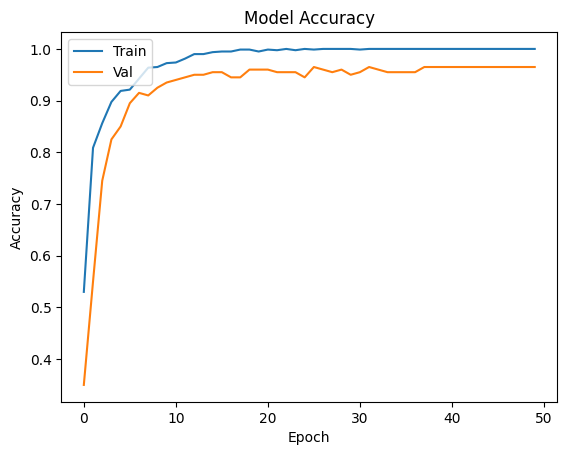

In [57]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [58]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

7/7 [==============================] - 0s 9ms/step - loss: 0.1511 - acc: 0.9650
Accuracy on test set is: 0.9649999737739563


In [59]:
X_test

array([[[-3.17795837e+02],
        [ 2.52307510e+00],
        [-3.48772736e+01],
        ...,
        [ 6.35936996e-03],
        [ 8.97062570e-03],
        [ 6.88282354e-03]],

       [[-3.56391815e+02],
        [ 3.65260162e+01],
        [-1.81964245e+01],
        ...,
        [ 2.17308430e-03],
        [ 1.82514125e-03],
        [ 1.63579371e-03]],

       [[-3.43952606e+02],
        [ 4.65079346e+01],
        [-4.19585991e+01],
        ...,
        [ 6.76802825e-03],
        [ 8.26505292e-03],
        [ 7.82518368e-03]],

       ...,

       [[-3.84959015e+02],
        [ 5.01831360e+01],
        [-5.00223503e+01],
        ...,
        [ 3.35291703e-03],
        [ 4.08498757e-03],
        [ 3.81092820e-03]],

       [[-2.76341400e+02],
        [ 4.07193804e+00],
        [-3.12311306e+01],
        ...,
        [ 5.56171918e-03],
        [ 7.71226222e-03],
        [ 6.87744422e-03]],

       [[-2.64965912e+02],
        [-1.04130421e+01],
        [-9.43169708e+01],
        ...,
        

In [60]:
model.predict(X_test)

7/7 [==============================] - 0s 8ms/step


array([[2.50553759e-03, 8.14859930e-04, 3.84110073e-03, 2.23713671e-03,
        9.90601301e-01],
       [7.60449609e-03, 2.35356968e-02, 9.58975434e-01, 5.91655588e-03,
        3.96778295e-03],
       [9.51531227e-04, 1.14205095e-03, 9.95495856e-01, 1.05949305e-03,
        1.35098258e-03],
       [1.82645547e-03, 2.25869799e-03, 9.93171096e-01, 1.20946905e-03,
        1.53413368e-03],
       [1.37396506e-03, 1.02929922e-03, 6.21532614e-04, 3.26487905e-04,
        9.96648729e-01],
       [1.46539521e-03, 3.97817884e-03, 9.90129530e-01, 2.33906903e-03,
        2.08787643e-03],
       [5.42083581e-04, 6.50805980e-03, 9.90150452e-01, 2.53097806e-03,
        2.68440199e-04],
       [6.66093081e-04, 1.09911710e-03, 2.34783394e-03, 1.05871097e-03,
        9.94828343e-01],
       [1.73754934e-02, 5.11079311e-01, 2.82980464e-02, 4.35981184e-01,
        7.26603530e-03],
       [2.63009709e-03, 9.91063118e-01, 3.27425636e-03, 1.42675720e-03,
        1.60585064e-03],
       [9.08889517e-04, 7.5796

In [61]:

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 0s 7ms/step


array([[47,  1,  0,  0,  0],
       [ 1, 31,  1,  0,  0],
       [ 1,  0, 37,  0,  0],
       [ 2,  1,  0, 41,  0],
       [ 0,  0,  0,  0, 37]])

In [62]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.94      0.94      0.94        33
           2       0.97      0.97      0.97        38
           3       1.00      0.93      0.96        44
           4       1.00      1.00      1.00        37

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.96      0.97       200



In [63]:
# save h5
model_uri = '../modelh5/model_LSTM.h5'
model.save(model_uri)

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 101, 64)           16896     
                                                                 
 dense_11 (Dense)            (None, 101, 32)           2080      
                                                                 
 flatten_3 (Flatten)         (None, 3232)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                206912    
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                      

In [65]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_114.wav')

1/1 [==============================] - 0s 466ms/step
[2.6606640e-01 7.2550457e-03 2.3100211e-01 2.7886275e-04 4.9539754e-01]
4
Predicted class: N


In [66]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,Signal,-461.970276,76.466766,8.232585,5.376007,3.355752,-14.712469,-14.283731,-11.86776,-7.578109,...,0.000997,0.001009,0.001038,0.001139,0.000566,0.000932,0.000775,0.000444,0.000473,NaN
